# Python fundamentals

<div class="objectives">
  
### Objectives

- Recap why pandas has been the go to package for most of python's history.
- Explore pitfalls of pandas and python in general.
- What does parallel mean?

</div>

# Background: What is Parallel Python?

Parallel computing is when many different tasks are carried out simultaneously. Python does this by creating independent processes that ship data, program files and libraries to an isolated ecosystem where computation is performed. There are three main models for parallel computing:

- **Embarrassingly parallel:** the code does not need to synchronize/communicate with other instances, and you can run multiple instances of the code separately, and combine the results later. If you can do this, great! (array jobs, task queues)

- **Shared memory parallelism:** Parallel threads need to communicate and do so via the same memory (variables, state, etc). (OpenMP)

- **Message passing:** Different processes manage their own memory segments. They share data by communicating (passing messages) as needed. (Message Passing Interface (MPI)).


### Modern approaches to speed up code

Traditional implemententations of making code parallel are done on a low level. 

However, open source software has ***evolved*** dramatically over the last few years allowing more ***high level implementations and concise 'pythonic' syntax*** that wraps around low level tools. These modern tools also address the nature of why code takes long to run in the Big Data / Data Science world we live in, that is, function / compute-bound and data-bound bottlenecks,with a more accessible high level syntax. 

***The focus on this course is to use these modern high level implementations to address both Data and Function Bound bottlenecks.***

## Some terminology: Processes, threads and shared memory

- A ***process*** is a collection of resources including program files and memory that operates as an independent entity. Since each process has a seperate memory space, it can operate independently from other processes. It cannot easily access shared data in other processes.

- A ***thread*** is the unit of execution within a process. A process can have anywhere from just one thread to many threads. Threads are considered lightweight because they use far less resources than processes. Threads also share the same memory space so are not independent.

<figure>
  <img src="../fig/process_v_thread.png" style="margin:6px;width:300px"/>
</figure><br>

<figure>
  <img src="../fig/process_threads_comparison.png" style="margin:6px;width:400px"/>
</figure><br>

The designers of the Python language made the choice that only one thread in a process can run actual Python code by using the so-called global interpreter lock (GIL).

External libraries (NumPy, SciPy, Pandas, etc), written in C or other languages, can release the lock and run multi-threaded. Code writen in native Python has the GIL limitation.

The ***multiprocessing library*** can be used to release the GIL on native Python code. However, modern packages such as Dask and Polars use it under the hood without specifying pools of resources to be used.

### Pandas Dataframes - Recap The Staple of Python data manipulation

Pandas has been the standard in Python for many years

1. Has an extensive set of Features.
2. Represent commond datastructures and operatings.
3. Efficiency (when using the optimised c code under the hood).
4. Wide integration with other open source libraries.

Lets recap the Pandas syntax along with an example of a common workflow, focusing on pandas dataframes. 

In [1]:
# Import libraries and datasets
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

#load the data
df = sns.load_dataset('diamonds')
df.to_csv('diamonds.csv')
df.head() #inspect DataFrame


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### DataFrame Functions
Functions are available that are attached to the DataFrame class
Common methods are: 

- **filter**: Subset the dataframe columns or rows according to the specified index labels. 
- **assign**: assign / mutate new columns in dataframe
- **query**: query the columns of a DataFrame with a boolean expression
- **groupby** : group dataframe into sections, usually followed by aggregations
- **apply** : Apply a function along an axis of the DataFrame

In [2]:
# A whole bunch of stuff - recap on pandas

# Inspect dataframe attributes -------------------------------- 

df.index # name of index, in this case a range
df.columns # variables carat to z
df.values # values as a numpy.ndarray
df.dtypes # data types of variables
df.shape # rows to column structure
df.ndim # number of dimensions


# filter or create columns ------------------------------------------------
df.filter(['cut']) # returns pandas.DataFrame
df['cut'] # as opposed to this which returns pandas.Series or df.cut
df.filter(["carat","cut"]) # filter more than one variables 
df.filter(regex=  "^c") # with regular expressions
df.filter([0,2,5], axis=0).head() # filter rows keeping in mind the index

df.assign(size = 1) #fills same value
df = df.assign(size = np.sqrt(df.x ** 2 + df.y ** 2 + df.z ** 2)) #element wise vector addition


# subset observations with query ---------------------------------------------------------------- 
# The quotes in query need to be single-outside, double-inside 
df.query('color == "E"') # filter observations by criteria
df.query('cut == "Ideal" or cut == "Premium"') # filter observations with logical expression
df.query('cut == "Ideal" | cut == "Premium"')  # same thing
df.query("cut.str.match('^G')") # query doesn't have regex parameter but can be incorporated via str attribute
df.query("clarity.str.contains('^\w+1')")
df.query('price > 500') # querying numeric


# chaining manipulations
df.query('price < 500').head() 

(df
 .filter(['carat', 'color'])
 .query('color == "E"')
 .head(3))

# Each column in the pd.Dataframe is pd.Series with methods available
df.cut    # referenced column on its own
df.cut.value_counts()   
df.cut.unique()
df.carat.mean()

# groupby: splits DataFrame into multiple compartments and returns a group-by object
# which aggregations can be applied on each group
df.groupby('cut').price.agg('std')
df.groupby('cut').mean(numeric_only=True)

# apply functions : apply a function to a DataFrame over columns (axis = 1) or rows (axis = 0) 
df.assign(norm = df.filter(['x','y','z']).apply(np.linalg.norm,axis = 1)) # element / rowwise norm equivalent

# map : very similar to apply but acts on pd.Series rather than pd.DataFrame
df.price.map(lambda r : r + 1) #returns a pd.Series

# applymap: Apply a function to a DataDrame element-wise
df.filter(['x','y','z']).applymap(lambda x : x **2) 


/var/folders/j2/6znnc26n7r9gk1qjgh7wy6bh0000gn/T/ipykernel_1074/1161367035.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cut').price.agg('std')
/var/folders/j2/6znnc26n7r9gk1qjgh7wy6bh0000gn/T/ipykernel_1074/1161367035.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('cut').mean(numeric_only=True)
/var/folders/j2/6znnc26n7r9gk1qjgh7wy6bh0000gn/T/ipykernel_1074/1161367035.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.filter(['x','y','z']).applymap(lambda x : x **2)


,x,y,z
0,15.6025,15.8404,5.9049
1,15.1321,14.7456,5.3361
2,16.4025,16.5649,5.3361
3,17.6400,17.8929,6.9169
4,18.8356,18.9225,7.5625
...,...,...,...
53935,33.0625,33.1776,12.2500
53936,32.3761,33.0625,13.0321
53937,32.0356,32.2624,12.6736
53938,37.8225,37.4544,13.9876


Alot more functions available in [Pandas API](https://pandas.pydata.org/docs/reference/index.html). Arguably too many to remember the syntax in an intuitive way. 

### Typical workflow - Reading, Manipulating and Plotting

The below follows a generic workflow of reading and manipulation data for insight and visualisation. Note in each assignment calcuations are triggered. As data becomes larger this slows down computation (assuming the data fits in memory).

In [9]:

#reading data
df = pd.read_csv('diamonds.csv') 

#subseting data
df_subset = (df 
             .filter(['cut','carat','clarity','x','y','z','price'])
             .query('carat < 2.5'))

#manipulating data for insight
premium_by_clarity = (df.assign(demeaned = df.price - df.groupby('cut').price.transform('mean'))
  .groupby('clarity').price.mean()
  .sort_values())

premium_by_clarity

clarity
VVS1    2523.114637
IF      2864.839106
VVS2    3283.737071
VS1     3839.455391
I1      3924.168691
VS2     3924.989395
SI1     3996.001148
SI2     5063.028606
Name: price, dtype: float64

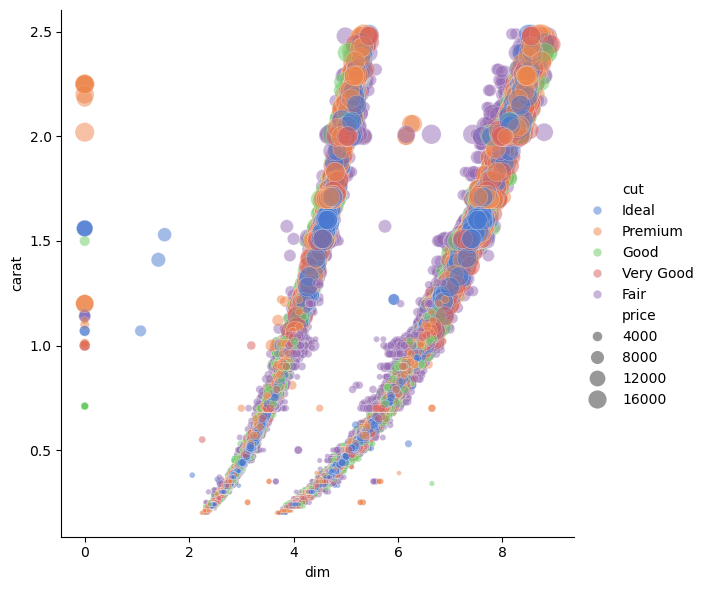

In [4]:
#visualization
df_longer = (df_subset 
    .melt(id_vars=['cut','price','clarity','carat'], 
    value_vars = ['x','y','z'],
    value_name = "dim"
     )
)
sns.relplot(x="dim", y="carat", hue="cut", size="price",
            sizes=(10, 200), alpha=.5, palette="muted",
            height=6, data=df_longer.query('dim < 12'));

<div class="challenge">

### Challenge 

Make a plot of the carat vs price, group the colors by the cut and the symbol size by the color of the diamond. Limit the dataset to just show the "I1" clarity.

<details>
<summary>Solution</summary>

This can be done in a few ways, but Seaborn interfaces with pandas-like dataframes seamlessly to make these simple data-manging tasks easy. 
    
```python   
sns.relplot(x="carat", y="price", hue="cut",size='color',
        sizes=(10, 200), alpha=.5, palette="muted",
        height=6, data=data.query('clarity == "I1"'))
```
</details>
</div>

Some common issues with this typical workflow are:

1. Data may not fit easily into one dataframe 

2. Each data manipulation (and reassignment to a variable) triggers computation.

3. Pandas syntax sometimes difficult to understand and holds too many options to remember.

4. Python GIL prevent threads from running at the same time (for now)


### Aside - Generators may be helpful for functions you define yourself

A Generator in Python is a function that returns an iterator (rather than an actual value/ set of values) using the Yield keyword. Think of it as defining the process rather than processing.

A few useful links with ideas on how to do this:

- [https://caam37830.github.io/book/index.html](https://caam37830.github.io/book/index.html)
- [https://python-course.eu/](https://python-course.eu/)
- [https://realpython.com/fibonacci-sequence-python/](https://realpython.com/fibonacci-sequence-python/)

In [5]:
def FibonacciGenerator(n):
    """ 
    note: n is limit of fibonacci value rather than count
    """
    a = 0
    b = 1
    while a < n:
        yield a
        a, b = b, a + b
        

def is_even(sequence):
    """ reduces a sequence to even numbers
    """
    for n in sequence:
        if n % 2 == 0:
            yield n

In [6]:
# Can consume generators by converting to list
list(is_even([1,2,3,4]))

[2, 4]

In [7]:
list(FibonacciGenerator(500))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

In [8]:
# Build up sequences of manipulations in memory with generators 
# and selectively trigger consumption with "list" for efficiency. 
# Conceptually this is using lazy functions which we will talk more about.
list(is_even(FibonacciGenerator(500)))

[0, 2, 8, 34, 144]

<div class="keypoints">

### Key points

- Stay within the pandas, numpy ecosystem as much as possible (its c code under the hood)
- Consider building a series of generators
- The GIL prevents python from utilising multple cores effectively on your machine.

</div>
